1. Generación de Datos:
○ Simula un dataset de 300 pacientes con las siguientes variables:
■ edad: entre 18 y 80 años.
■ imc: valores entre 18 y 38, siguiendo una distribución
normal.
■ colesterol: valores entre 130 y 300 mg/dL.
■ pa_sistolica: variable dependiente, relacionada
positivamente con edad, IMC y colesterol, más un componente
aleatorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [3]:


# Fijar semilla para reproducibilidad
np.random.seed(42)

# Número de pacientes
n_pacientes = 300

# Generación de datos

edad = np.random.randint(18, 81, n_pacientes)
imc = np.random.normal(25, 5, n_pacientes)
imc = np.clip(imc, 18, 38)


colesterol = np.random.randint(130, 300, n_pacientes)

pa_sistolica = (90 + 0.5 * edad + 0.7 * imc + 0.2 * colesterol + np.random.normal(0, 5, n_pacientes)

)

# Crear DataFrame
df = pd.DataFrame({
    "edad": edad,
    "imc": imc,
    "colesterol": colesterol,
    "pa_sistolica": pa_sistolica
    })


df.head()


,edad,imc,colesterol,pa_sistolica
0,56,24.826441,291,201.127365
1,69,19.156610,247,189.319799
2,46,30.714114,132,159.162246
3,32,28.759665,252,180.677459
4,60,28.955160,179,182.503487


2. Exploración de Datos:
○ Visualiza una muestra de los datos y obtén estadísticas
descriptivas.
○ Genera histogramas para analizar la distribución de cada variable.
○ Crea una matriz de correlación para observar las relaciones entre
variables.
○ Realiza gráficos de dispersión entre la PA sistólica y cada
variable independiente.

Muestra de datos:
   edad        imc  colesterol  pa_sistolica
0    56  24.826441         291    201.127365
1    69  19.156610         247    189.319799
2    46  30.714114         132    159.162246
3    32  28.759665         252    180.677459
4    60  28.955160         179    182.503487

Estadísticas descriptivas:
             edad         imc  colesterol  pa_sistolica
count  300.000000  300.000000  300.000000    300.000000
mean    50.533333   25.333139  211.173333    174.948426
std     18.916881    4.560540   48.524758     14.314409
min     18.000000   18.000000  130.000000    140.211712
25%     34.000000   21.517002  168.750000    165.389085
50%     51.500000   25.394197  208.000000    175.813602
75%     67.250000   28.332487  252.500000    185.539229
max     80.000000   38.000000  299.000000    218.626196


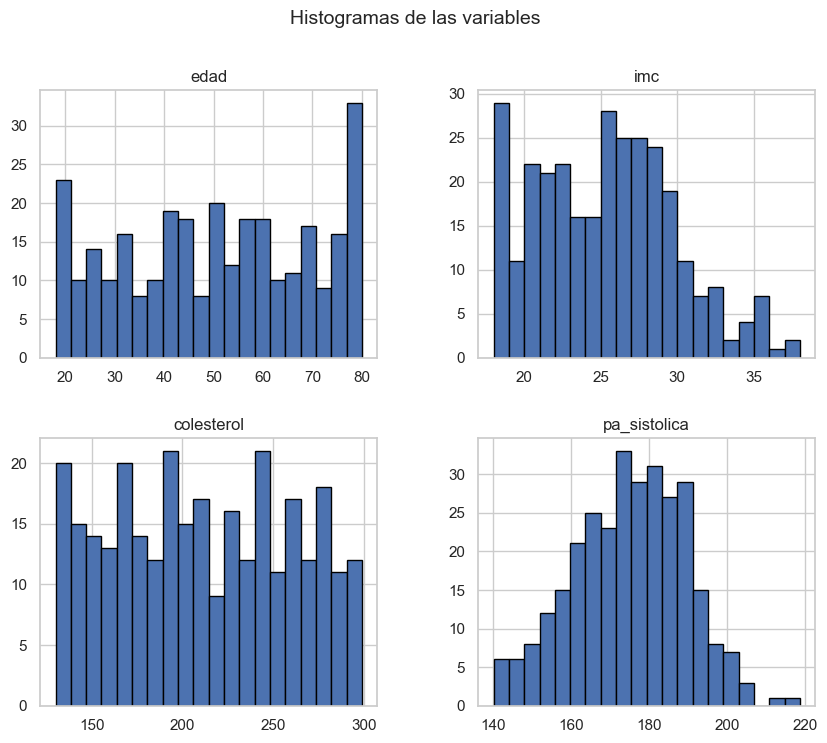

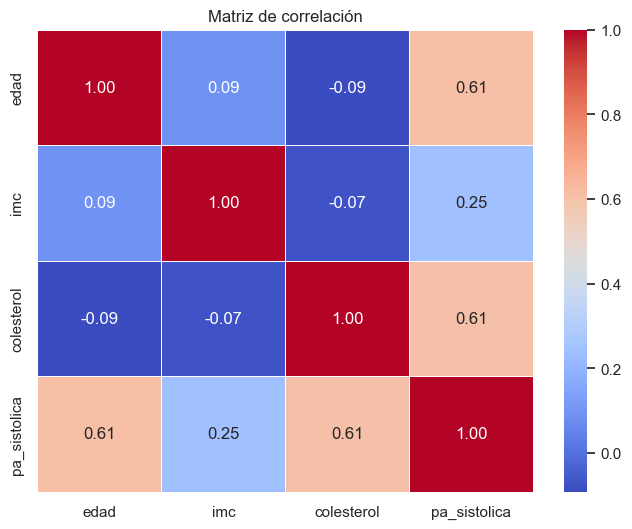

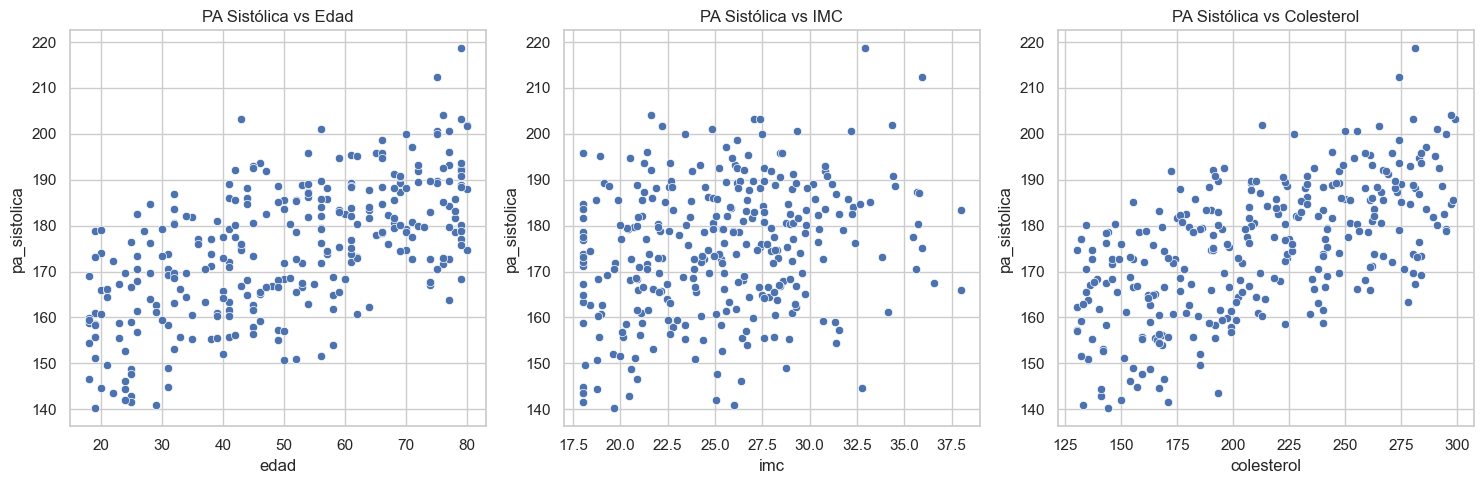

<Figure size 640x480 with 0 Axes>

In [12]:
# Mostrar una muestra de los datos
print("Muestra de datos:")
print(df.head())

# Obtener estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Histograma de cada variable
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las variables", fontsize=14)
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# Gráficos de dispersión entre la presión arterial sistólica y cada variable independiente
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df["edad"], y=df["pa_sistolica"], ax=axes[0])
axes[0].set_title("PA Sistólica vs Edad")

sns.scatterplot(x=df["imc"], y=df["pa_sistolica"], ax=axes[1])
axes[1].set_title("PA Sistólica vs IMC")

sns.scatterplot(x=df["colesterol"], y=df["pa_sistolica"], ax=axes[2])
axes[2].set_title("PA Sistólica vs Colesterol")

plt.tight_layout()
plt.show()
plt.savefig("relaciones_bivariales.png")

3. Regresión Lineal Simple:
○ Desarrolla un modelo de regresión lineal simple para cada
predictor (edad, imc, colesterol) por separado.
○ Divide los datos en conjunto de entrenamiento (70%) y prueba
(30%).
○ Entrena el modelo y realiza predicciones sobre el conjunto de
prueba.
○ Evalúa el modelo usando el Error Cuadrático Medio (MSE) y el
coeficiente de determinación (R²).
○ Visualiza la relación entre los valores reales y predichos para
cada modelo.
○ Usa una librería estadística para obtener el resumen del modelo y
analizar significancia de coeficientes.

In [5]:
#Regresión con Edad Vamos a dividir los datos en conjunto de entrenamiento (70%) y prueba (30%) 
# para cada predictor. Primero, vamos a definir el predictor y la variable dependiente pa_sistolica.

# Dividir datos para edad
X_age = df[["edad"]]  # Predictor o variable independiente
y = df["pa_sistolica"]  # Variable dependiente

# Dividir en conjunto de entrenamiento y prueba
X_train_age, X_test_age, y_train, y_test = train_test_split(X_age, y, test_size=0.3, random_state=42)

In [6]:
#Entrenar el modelo de regresión lineal simple
#Vamos a usar el modelo de Regresión Lineal de Scikit-learn para entrenar y hacer predicciones.

# Crear el modelo de regresión lineal
model_age = LinearRegression()

# Entrenar el modelo
model_age.fit(X_train_age, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_age = model_age.predict(X_test_age)


In [7]:
#Evaluación del modelo
#Usamos el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²) 
# para evaluar el modelo.

# Evaluación del modelo con MSE y R²
mse_age = mean_squared_error(y_test, y_pred_age)
r2_age = r2_score(y_test, y_pred_age)

print(f"Error Cuadrático Medio (MSE) para Edad: {mse_age:.2f}")
print(f"Coeficiente de Determinación (R²) para Edad: {r2_age:.2f}")

Error Cuadrático Medio (MSE) para Edad: 112.30
Coeficiente de Determinación (R²) para Edad: 0.43


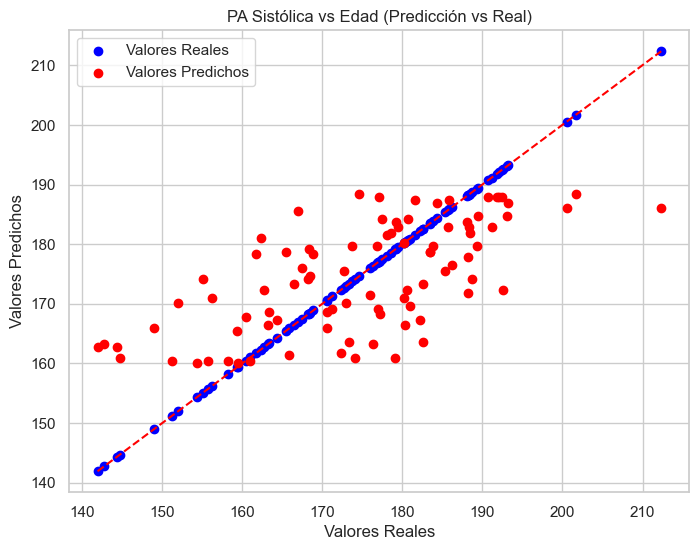

In [ ]:
#Visualización de la relación entre valores reales y predichos
#Vamos a visualizar cómo se relacionan los valores reales con los predichos.

# Visualizar valores reales vs predichos
plt.figure(figsize=(8, 6))

#plt.scatter(y_test, y_pred_age, color='blue') #solo da un color para toda la grafica
#para darle un color distinto a cada punto
plt.scatter(y_test, y_test, color='blue', label='Valores Reales')
plt.scatter(y_test, y_pred_age, color='red', label='Valores Predichos')
plt.legend()  # Mostrar la leyenda

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title("PA Sistólica vs Edad (Predicción vs Real)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.show()

In [9]:
#Resumen del modelo y análisis de significancia de coeficientes
#Usamos Statsmodels para obtener un resumen detallado del modelo, 
# incluyendo los coeficientes y su significancia.

# Añadir constante para el intercepto
X_train_age_sm = sm.add_constant(X_train_age)

# Crear el modelo de regresión con Statsmodels
model_age_sm = sm.OLS(y_train, X_train_age_sm).fit()

# Resumen del modelo
print(model_age_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     110.5
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           5.35e-21
Time:                        11:12:32   Log-Likelihood:                -813.11
No. Observations:                 210   AIC:                             1630.
Df Residuals:                     208   BIC:                             1637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.7763      2.350     64.585      0.0

In [10]:
#Repetir para IMC y Colesterol
#Repite los pasos anteriores para las variables IMC y Colesterol:

# Para IMC
X_imc = df[["imc"]]
X_train_imc, X_test_imc = train_test_split(X_imc, test_size=0.3, random_state=42)
model_imc = LinearRegression()
model_imc.fit(X_train_imc, y_train)
y_pred_imc = model_imc.predict(X_test_imc)

# Evaluar el modelo
mse_imc = mean_squared_error(y_test, y_pred_imc)
r2_imc = r2_score(y_test, y_pred_imc)
print(f"MSE para IMC: {mse_imc:.2f}")
print(f"R² para IMC: {r2_imc:.2f}")

# Para Colesterol
X_colesterol = df[["colesterol"]]
X_train_colesterol, X_test_colesterol = train_test_split(X_colesterol, test_size=0.3, random_state=42)
model_colesterol = LinearRegression()
model_colesterol.fit(X_train_colesterol, y_train)
y_pred_colesterol = model_colesterol.predict(X_test_colesterol)

# Evaluar el modelo
mse_colesterol = mean_squared_error(y_test, y_pred_colesterol)
r2_colesterol = r2_score(y_test, y_pred_colesterol)
print(f"MSE para Colesterol: {mse_colesterol:.2f}")
print(f"R² para Colesterol: {r2_colesterol:.2f}")

MSE para IMC: 189.62
R² para IMC: 0.04
MSE para Colesterol: 134.40
R² para Colesterol: 0.32


4. Regresión Lineal Múltiple:
○ Construye un modelo de regresión múltiple usando edad, imc y
colesterol como predictores.
○ Realiza el mismo procedimiento de división de datos,
entrenamiento, predicción y evaluación.
○ Obtén y analiza los coeficientes de cada variable.

In [17]:
# Definir los predictores y la variable dependiente
X = df[["edad", "imc", "colesterol"]]  # Predictores
y = df["pa_sistolica"]  # Variable dependiente

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Añadir la Constante para el Intercepto
#Como en el caso de la regresión lineal simple, debemos añadir una constante 
# (columna de 1s) para el término de intercepto.


# Añadir constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)



#Ajuste del Modelo de Regresión Múltiple
#Ahora ajustamos el modelo de regresión múltiple utilizando el método OLS() de Statsmodels.

#Crear el modelo de regresión múltiple con Statsmodels
model_multi_sm = sm.OLS(y_train, X_train_sm).fit()


#Resumen del Modelo
#Finalmente, mostramos un resumen detallado del modelo, donde se incluyen 
# los coeficientes de cada predictor, el error estándar, los valores p, R² y
#  otras métricas de rendimiento del modelo.


# Resumen del modelo de regresión múltiple
print(model_multi_sm.summary())


#Predicciones y Evaluación
#Realizamos las predicciones sobre el conjunto de prueba, y evaluamos el modelo 
# utilizando Error Cuadrático Medio (MSE) y R².
# Realizar predicciones en el conjunto de prueba
y_pred_multi = model_multi_sm.predict(X_test_sm)

# Calcular el Error Cuadrático Medio (MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")





                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     469.4
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           8.63e-92
Time:                        12:59:39   Log-Likelihood:                -641.67
No. Observations:                 210   AIC:                             1291.
Df Residuals:                     206   BIC:                             1305.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8990      2.799     31.399      0.0

Evaluación de Modelos:
○ Compara el desempeño de los modelos simples con el modelo
múltiple.
○ Determina qué variable tiene mayor impacto en la predicción de la
PA sistólica.

In [19]:

# Modelo Simple: Edad
X_age = df[["edad"]]  # Predictor
X_train_age, X_test_age, y_train, y_test = train_test_split(X_age, y, test_size=0.3, random_state=42)
model_age = LinearRegression()
model_age.fit(X_train_age, y_train)
y_pred_age = model_age.predict(X_test_age)

mse_age = mean_squared_error(y_test, y_pred_age)
r2_age = r2_score(y_test, y_pred_age)

# Modelo Simple: IMC
X_imc = df[["imc"]]  # Predictor
X_train_imc, X_test_imc, y_train, y_test = train_test_split(X_imc, y, test_size=0.3, random_state=42)
model_imc = LinearRegression()
model_imc.fit(X_train_imc, y_train)
y_pred_imc = model_imc.predict(X_test_imc)

mse_imc = mean_squared_error(y_test, y_pred_imc)
r2_imc = r2_score(y_test, y_pred_imc)

# Modelo Simple: Colesterol
X_colesterol = df[["colesterol"]]  # Predictor
X_train_col, X_test_col, y_train, y_test = train_test_split(X_colesterol, y, test_size=0.3, random_state=42)
model_col = LinearRegression()
model_col.fit(X_train_col, y_train)
y_pred_col = model_col.predict(X_test_col)

mse_col = mean_squared_error(y_test, y_pred_col)
r2_col = r2_score(y_test, y_pred_col)

# Modelo Múltiple: Edad, IMC, Colesterol
X_multi = df[["edad", "imc", "colesterol"]]  # Predictores
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
y_pred_multi = model_multi.predict(X_test_multi)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# Comparación de MSE y R²
print("Desempeño de los Modelos de Regresión Lineal:")
print(f"Modelo Simple - Edad: MSE = {mse_age:.2f}, R² = {r2_age:.4f}")
print(f"Modelo Simple - IMC: MSE = {mse_imc:.2f}, R² = {r2_imc:.4f}")
print(f"Modelo Simple - Colesterol: MSE = {mse_col:.2f}, R² = {r2_col:.4f}")
print(f"Modelo Múltiple: MSE = {mse_multi:.2f}, R² = {r2_multi:.4f}")

# Impacto de las Variables en el Modelo Múltiple
print("\nImpacto de las Variables en el Modelo Múltiple:")
for i, predictor in enumerate(["edad", "imc", "colesterol"]):
    print(f"{predictor}: Coeficiente = {model_multi.coef_[i]:.4f}")



Desempeño de los Modelos de Regresión Lineal:
Modelo Simple - Edad: MSE = 112.30, R² = 0.4330
Modelo Simple - IMC: MSE = 189.62, R² = 0.0426
Modelo Simple - Colesterol: MSE = 134.40, R² = 0.3214
Modelo Múltiple: MSE = 28.36, R² = 0.8568

Impacto de las Variables en el Modelo Múltiple:
edad: Coeficiente = 0.4976
imc: Coeficiente = 0.7239
colesterol: Coeficiente = 0.2069


6. Visualización de Resultados:
○ Grafica los residuos del modelo múltiple para verificar la
distribución y homogeneidad.
○ Compara gráficamente los valores predichos y reales

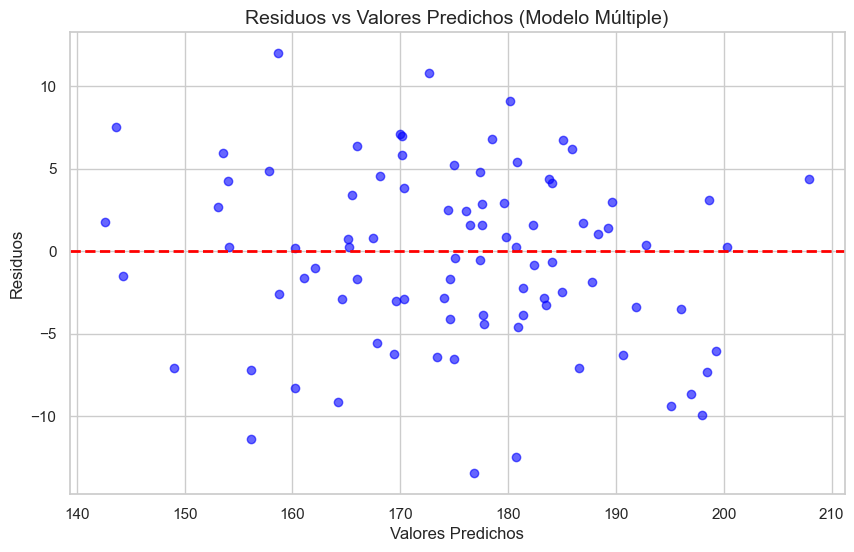

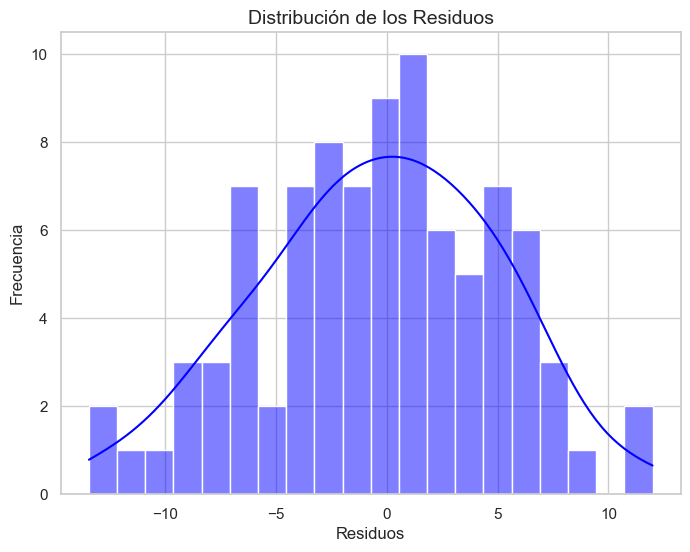

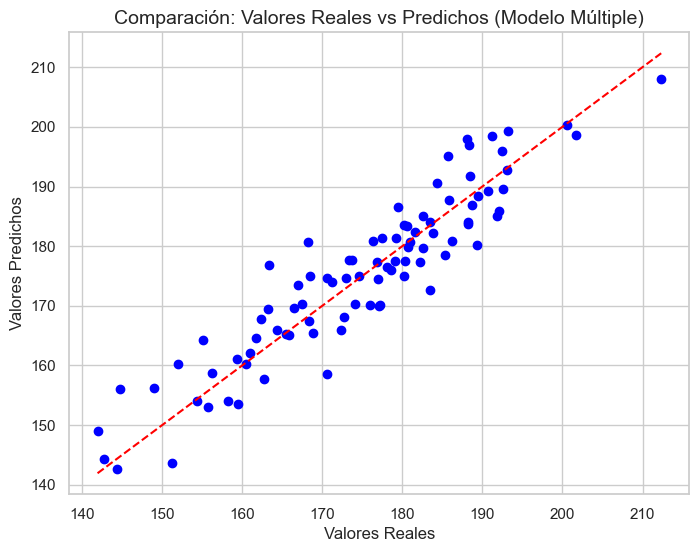

In [20]:
# Gráfico de Residuos para el Modelo Múltiple
residuos = y_test - y_pred_multi

# Graficamos los residuos vs los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, residuos, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Línea horizontal en y=0 para referencia
plt.title('Residuos vs Valores Predichos (Modelo Múltiple)', fontsize=14)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='blue', bins=20)
plt.title('Distribución de los Residuos', fontsize=14)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Comparación de Valores Reales vs Predichos (Gráfico de dispersión)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title('Comparación: Valores Reales vs Predichos (Modelo Múltiple)', fontsize=14)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()